# Magnetic and Diagenetic Analyses of IODP Expedition 347 Site M0063 Hole D
_____

Site M0063 IODP Proceedings: doi:10.2204/iodp.proc.347.107.2015

Core: IODP Expedition 347 Site M0063 Hole D
Lat/long: 58°37.35′N, 18°15.26′E
Water depth: 437.1 m

Data in analysis: Magnetite ppm (from Ms measurements on VSM), sedimentation rate, total organic carbon, pore water chemistry.

Also comparing our Ms data to iron extraction data from Egger at al. (2017)

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magnetite = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="VSM results")
iodp_TOC = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="TOC")
iodp_geochem = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="geochem")
age_model = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="age_model")
sarah_data = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="sarah-Ms")

# convert age model from ka to Ma
age_model["Age [Ma]"] = age_model["Age [ka]"] / 100
# calculate sed rates
sed_rates = data_fns.sed_rates(age_model["Age [Ma]"], age_model["Depth [ambsf]"])


In [3]:
# create dataframes of what we are interested in (from dictionaries)
# note--depth is actually in ambsf (see Obrochta 2017), but using
#  mbsf here for compatibility with data_fns library. will rename at end
magn_df = pd.DataFrame({"Depth [mbsf]":magnetite["Depth [ambsf]"], "Magnetite [ppm]":magnetite["magnetite (ppm)"], "Depth [amcd]":magnetite["Depth [amcd]"]})

sarah_data_df = pd.DataFrame({"Depth [mbsf]":sarah_data["Depth [ambsf]"], "Sarah Magnetite [ppm]":sarah_data["Sarah Magnetite [ppm]"], "Depth [amcd]":sarah_data["Depth [amcd]"]})

iodp_geochem_df = pd.DataFrame({"Depth [mbsf]":iodp_geochem["Depth [ambsf]"], "Sulfate [mM]" : iodp_geochem["Sulfate [mM]"], "Fe 2+ [uM]" : iodp_geochem["Fe2+ [uM]"]})

iodp_TOC_df = pd.DataFrame({"Depth [mbsf]":iodp_TOC["Depth [ambsf]"], "TOC [wt. %]":iodp_TOC["TOC [wt. %]"]})

sed_rates_df = pd.DataFrame({"Depth [mbsf]":age_model["Depth [ambsf]"], "Sedimentation Rate [m/Myr]":sed_rates})

# next, append them all together. We can use the result for comparison plots
# after all the appending, sort the whole thing by depth and reset index
comb_df = magn_df.append(sarah_data_df).append(iodp_geochem_df).append(iodp_TOC_df).append(sed_rates_df).sort_values(by="Depth [mbsf]").reset_index(drop=True)

# there are two empty rows (no data), so here we drop them
# to stay neat and make sure interpolation works
comb_df.dropna(subset=["Depth [mbsf]"], inplace=True)

In [4]:
# next task is to interpolate between non-magnetite data points
# passing in columns to interpolate (except for sed rate)
# don't fill final rates b/c age model ends ~40m, data ends ~85m
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"], sed_rates=True, fill_final_rates=False)

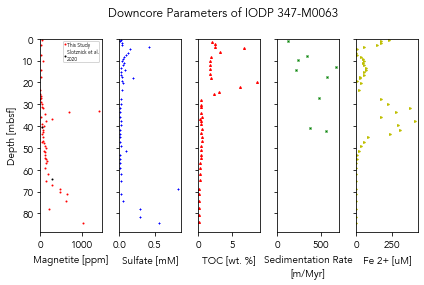

In [14]:
# plot downcore figures
colors = ["r", "b", "r", "g", "y", "k", "c"]
markers = [".", "+", "^", "x", ">", "<", "v"]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Myr]", "Fe 2+ [uM]"], comb_df, colors, markers)
# also plot sarah's data but do it separate so we can denote it
dc_axs[0].plot(comb_df["Sarah Magnetite [ppm]"], comb_df["Depth [mbsf]"], color="black", marker=".", markersize=2, linestyle="None")
# add legend and fiddle with spacing so it fits
leg = dc_axs[0].legend(['This Study', 'Slotznick et al.\n2020'], handletextpad=0.1, fontsize=5, borderpad=0.1, handlelength=0.5, labelspacing=0.2)
dc_fig.suptitle("Downcore Parameters of IODP 347-M0063", x=0.525)
dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Myr]")
#dc_axs[0].set_xlim(0, 300)
#dc_axs[0].set_xscale("log")
dc_fig.tight_layout()
dc_fig.savefig("outputs/kreisler_m0063/m0063d_dc-sep7.pdf")


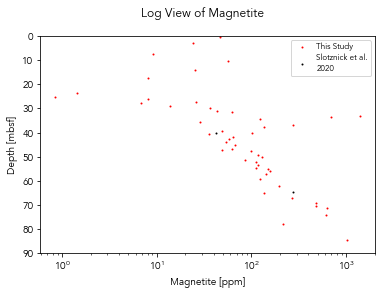

In [13]:
fig0, ax0 = plt.subplots()
ax0.plot(comb_df["Magnetite [ppm]"], comb_df["Depth [mbsf]"], "r.", markersize=2, linestyle="None")
ax0.plot(comb_df["Sarah Magnetite [ppm]"], comb_df["Depth [mbsf]"], color="black", marker=".", markersize=2, linestyle="None")
ax0.set_xscale("log")
ax0.set_xlabel("Magnetite [ppm]")
ax0.set_ylabel("Depth [mbsf]")
ax0.set_ylim(90,0)
fig0.suptitle("Log View of Magnetite")
leg0 = ax0.legend(['This Study', 'Slotznick et al.\n2020'], fontsize=8, labelspacing=0.2)
fig0.savefig("outputs/kreisler_m0063/m0063d_magnetite-log-sep7.pdf")

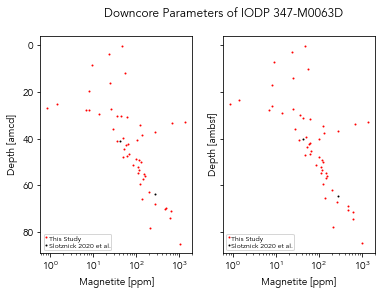

In [17]:
# plot downcore in amcd
fig, axs = plt.subplots(1, 2, sharey="all")
axs[0].plot(comb_df["Magnetite [ppm]"], comb_df["Depth [amcd]"],color="red", marker=".", markersize=2, linestyle="None")
axs[0].plot(comb_df["Sarah Magnetite [ppm]"], comb_df["Depth [amcd]"],color="black", marker=".", markersize=2, linestyle="None")
axs[0].set_ylabel("Depth [amcd]")
axs[0].invert_yaxis()
axs[0].set_xlabel("Magnetite [ppm]")
axs[0].set_xscale("log")

axs[1].plot(comb_df["Magnetite [ppm]"], comb_df["Depth [mbsf]"],color="red", marker=".", markersize=2, linestyle="None")
axs[1].plot(comb_df["Sarah Magnetite [ppm]"], comb_df["Depth [mbsf]"],color="black", marker=".", markersize=2, linestyle="None")
axs[1].set_ylabel("Depth [ambsf]")
axs[1].set_xlabel("Magnetite [ppm]")
axs[1].set_xscale("log")

# add legend and fiddle with spacing so it fits
leg1 = axs[0].legend(['This Study', 'Slotznick 2020 et al.'], handletextpad=0.1, fontsize='x-small', borderpad=0.1, handlelength=0.5, labelspacing=0.2)
leg2 = axs[1].legend(['This Study', 'Slotznick 2020 et al.'], handletextpad=0.1, fontsize='x-small', borderpad=0.1, handlelength=0.5, labelspacing=0.2)
fig.suptitle("Downcore Parameters of IODP 347-M0063D", x=0.55)
fig.savefig("outputs/kreisler_m0063/m0063d_dc-sarah-amcd.pdf")

coding problem time :O

We want to compare Egger iron extractions to the data above. We have ambsf depths
for Egger data, but not mbsf. The Obrochta script doesn't allow converting from ambsf to amcd, only from mbsf to ambsf and/or amcd. We do have a table of mbsf depths (spaced at 1 cm intervals) and the equivalent ambsf and amcd depths. So for each Egger data point, we need to look up the closest ambsf depth value in the Obrochta table. Pandas provides a binary search function that we can use.

In [8]:
# load conversion table and egger data
conversions = pd.read_excel("data/347-M0063E_adj_depth.xlsx")
egger_iron = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="egger-iron")
egger_sulf = pd.read_excel("data/kreisler-m0063.xlsx", sheet_name="egger-sulf")

In [9]:
# for each of the depths, look up index of the closest value in conversions table
lookups = conversions["Depth adj [ambsf]"]
amcd = conversions["Depth adj mcd [amcd]"]

iron_depths = egger_iron["Depth (ambsf)*"]
iron_converted = []
for i in range(len(iron_depths)):
    # look up closest value, then use that index to
    # convert (roughly) to amcd
    iron_converted.append(amcd[lookups.searchsorted(iron_depths[i])])

# do the same for sulf
sulf_depths = egger_sulf["Depth (ambsf)*"]
sulf_converted = []
for i in range(len(sulf_depths)):
    sulf_converted.append(amcd[lookups.searchsorted(sulf_depths[i])])

# add converted depths to egger data
egger_iron["Depth [amcd]"] = iron_converted
egger_sulf["Depth [amcd]"] = sulf_converted


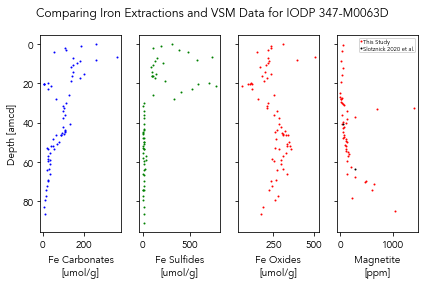

In [57]:
# plot our data and egger data together (using amcd depth)
# again plotting sarah's data separately

# plot egger oxides, carbs, sulfs, and our data
fig1, axs1 = plt.subplots(1, 4, sharey="all")
axs1[2].plot(egger_iron["Fe oxides (umol/g)"], egger_iron["Depth [amcd]"],color="red", marker=".", markersize=2, linestyle="None")
axs1[2].set_xlabel("Fe Oxides\n[umol/g]")
axs1[0].plot(egger_iron["Fe carb (umol/g)"], egger_iron["Depth [amcd]"],color="blue", marker=".", markersize=2, linestyle="None")
axs1[0].set_xlabel("Fe Carbonates\n[umol/g]")
axs1[1].plot(egger_sulf["Fe sulfides (umol/g)"], egger_sulf["Depth [amcd]"],color="green", marker=".", markersize=2, linestyle="None")
axs1[1].set_xlabel("Fe Sulfides\n[umol/g]")
axs1[3].plot(comb_df["Magnetite [ppm]"], comb_df["Depth [amcd]"],color="red", marker=".", markersize=2, linestyle="None")
axs1[3].plot(comb_df["Sarah Magnetite [ppm]"], comb_df["Depth [amcd]"],color="black", marker=".", markersize=2, linestyle="None")
axs1[3].legend(['This Study', 'Slotznick 2020 et al.'], handletextpad=0.1, fontsize='xx-small', borderpad=0.1, handlelength=0.5, labelspacing=0.2)
axs1[3].set_xlabel("Magnetite\n[ppm]")
axs1[0].set_ylabel("Depth [amcd]")
axs1[0].invert_yaxis()

fig1.suptitle("Comparing Iron Extractions and VSM Data for IODP 347-M0063D", x=0.5)
fig1.tight_layout()
fig1.savefig("outputs/kreisler_m0063/egger/summary_comp.pdf")

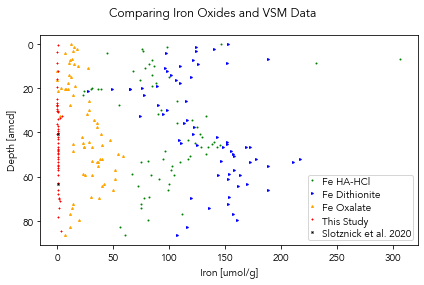

In [10]:
# plot egger oxides (with our data)
# first convert magnetite ppm into magnetite umol/g, then into fe umol/g
# magnetite is 231.533 g/mol, or 231.533/(10**6) g/umol
# atomic mass oxygen is 15.999
# atomic mass iron is 55.845
# magnetite is 0.724 iron
# our data is mass fraction of magnetite, which is units of g(magnetite)/g(sediment)
mag_umol = (comb_df["Magnetite [ppm]"]/(10**6))*(10**6/231.533)*0.724
sarah_mag_umol = (comb_df["Sarah Magnetite [ppm]"]/(10**6))*(10**6/231.533)*0.724

fig2, axs2 = plt.subplots()
axs2.plot(egger_iron["Fe ox1 (umol/g)"], egger_iron["Depth [amcd]"],color="green", marker=".", markersize=2, linestyle="None")
axs2.plot(egger_iron["Fe ox2 (umol/g)"], egger_iron["Depth [amcd]"],color="blue", marker=">", markersize=2, linestyle="None")
axs2.plot(egger_iron["Fe magn (umol/g)"], egger_iron["Depth [amcd]"],color="orange", marker="^", markersize=2, linestyle="None")
axs2.plot(mag_umol, comb_df["Depth [amcd]"],color="red", marker="+", markersize=2, linestyle="None")
axs2.plot(sarah_mag_umol, comb_df["Depth [amcd]"],color="black", marker="x", markersize=2, linestyle="None")

axs2.set_xlabel("Iron [umol/g]")
axs2.set_ylabel("Depth [amcd]")
axs2.invert_yaxis()
axs2.legend(['Fe HA-HCl', 'Fe Dithionite', 'Fe Oxalate', 'This Study', 'Slotznick et al. 2020'], fontsize='medium', borderpad=0.1, handlelength=0.5, labelspacing=0.2)

fig2.suptitle("Comparing Iron Oxides and VSM Data", x=0.5)
fig2.tight_layout()
fig2.savefig("outputs/kreisler_m0063/egger/oxides_comp1-sep7.pdf")

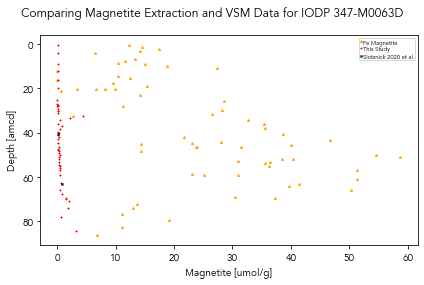

In [30]:
# plot just egger magn extraction and our data
fig3, axs3 = plt.subplots()
axs3.plot(egger_iron["Fe magn (umol/g)"], egger_iron["Depth [amcd]"],color="orange", marker="^", markersize=2, linestyle="None")
axs3.plot(mag_umol, comb_df["Depth [amcd]"],color="red", marker="+", markersize=2, linestyle="None")
axs3.plot(sarah_mag_umol, comb_df["Depth [amcd]"],color="black", marker="x", markersize=2, linestyle="None")

axs3.set_xlabel("Magnetite [umol/g]")
axs3.set_ylabel("Depth [amcd]")
axs3.invert_yaxis()
axs3.legend(['Fe Magnetite', 'This Study', 'Slotznick 2020 et al.'], handletextpad=0.1, fontsize='xx-small', borderpad=0.1, handlelength=0.5, labelspacing=0.2)

fig3.suptitle("Comparing Magnetite Extraction and VSM Data for IODP 347-M0063D", x=0.5)
fig3.tight_layout()
fig3.savefig("outputs/kreisler_m0063/egger/magn-comp.pdf", bbox_inches="tight")

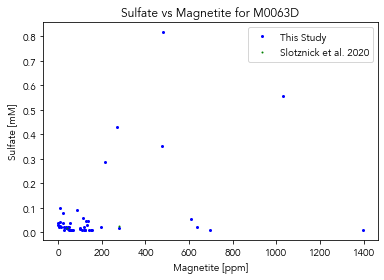

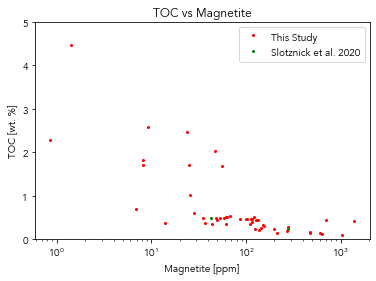

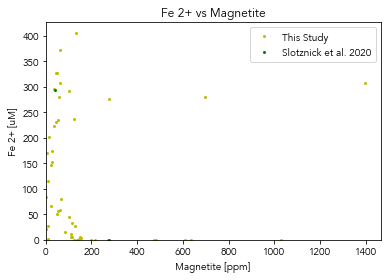

In [15]:
# plot comparison figures
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"], interpolated, ["b", "r", "y"], [".", ".", "."], markersize=4)

# label and save these if you want
# also including sarah data
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite for M0063D")
comp_axs[0].plot(interpolated["Sarah Magnetite [ppm]"], interpolated["Sulfate [mM]"], color="g", marker=".", markersize=2, linestyle="None")
comp_axs[0].legend(['This Study', 'Slotznick et al. 2020'])
#comp_figs[0].savefig("outputs/kreisler_m0063/m0063d_sulf-comp_sarah.pdf")

comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite", xscale="log")
comp_axs[1].plot(interpolated["Sarah Magnetite [ppm]"], interpolated["TOC [wt. %]"], color="g", marker=".", markersize=4, linestyle="None")
comp_axs[1].set_ylim(0,5)
comp_axs[1].legend(['This Study', 'Slotznick et al. 2020'])
#comp_figs[1].savefig("outputs/kreisler_m0063/m0063d_TOC-comp_sarah-sep7.pdf")

comp_axs[2].set(xlabel="Magnetite [ppm]", ylabel="Fe 2+ [uM]", title="Fe 2+ vs Magnetite")
comp_axs[2].plot(interpolated["Sarah Magnetite [ppm]"], interpolated["Fe 2+ [uM]"], color="g", marker=".", markersize=4, linestyle="None")
comp_axs[2].set_ylim(ymin=0)
comp_axs[2].set_xlim(xmin=0)
comp_axs[2].legend(['This Study', 'Slotznick et al. 2020'])
comp_figs[2].savefig("outputs/kreisler_m0063/m0063d_fe-comp_sarah-sep7.pdf")

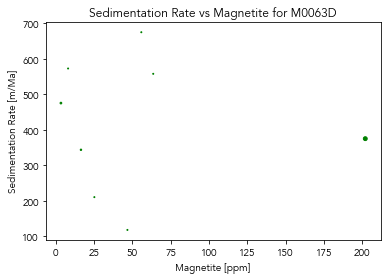

In [12]:
# sed rates comp plot
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Myr]", title = "Sedimentation Rate vs Magnetite for M0063D")
sed_fig.savefig("outputs/kreisler_m0063/m0063d_sed-comp.pdf")

In [5]:
# put the sarah data into its own df to store separately
sarah_raw = pd.DataFrame({"Depth [ambsf]":sarah_data["Depth [ambsf]"], "Magnetite [ppm]":sarah_data["Sarah Magnetite [ppm]"]})
sarah_inter = interpolated.dropna(subset=["Sarah Magnetite [ppm]"]).drop("Magnetite [ppm]", axis=1).rename(columns={"Depth [mbsf]":"Depth [ambsf]", "Sarah Magnetite [ppm]":"Magnetite [ppm]"})

# also export the sarah data to the excel sheet
data_fns.write_output(sarah_inter, "IODP 347-M0063_Slotznick", "data/comp_inter.xlsx")
data_fns.write_output(sarah_raw, "IODP 347-M0063_Slotznick", "data/comp_raw.xlsx")

In [ ]:
# take out the rows of sarah data (select only rows where no sarah data)
comb_df = comb_df[comb_df["Sarah Magnetite [ppm]"].isna()]
interpolated = interpolated[interpolated["Sarah Magnetite [ppm]"].isna()]
# delete sarah columns
comb_df.drop("Sarah Magnetite [ppm]", axis=1, inplace=True)
interpolated.drop("Sarah Magnetite [ppm]", axis=1, inplace=True)
# last thing to do is add the dataframes we used to the compilation excel doc
# first rename depth from mbsf to ambsf
comb_df.rename(columns={"Depth [mbsf]":"Depth [ambsf]"}, inplace=True)
interpolated.rename(columns={"Depth [mbsf]":"Depth [ambsf]"}, inplace=True)


# put the raw and interpolated data in separate files
data_fns.write_output(interpolated, "IODP 347-M0063", "data/comp_inter.xlsx")
data_fns.write_output(comb_df, "IODP 347-M0063", "data/comp_raw.xlsx")

# also export the sarah data to the excel sheet
data_fns.write_output(sarah_inter, "Slotznick_IODP 347-M0063", "data/comp_inter.xlsx")
data_fns.write_output(sarah_raw, "Slotznick_IODP 347-M0063", "data/comp_raw.xlsx")